<p align="center" ><img src="https://www.ai4kids.ai/wp-content/uploads/2019/07/ai4kids_website_logo_120x40.png"></img></p>

# 學AI真簡單 <1> 初探機器學習
## 第三章 動手實作監督式學習 
### 3-2 線性迴歸介紹與應用

<p align="right">© Copyright AI4kids.ai</p>

【在開始說明之前】


請先建立colab副本


[檔案] --> [在雲端硬碟中儲存副本]


**【前行】**

程式基本概念 https://bit.ly/2Y9Gq9d  

## 這是一個關於糖尿病的資料集，此數據描述了患者一年以後糖尿病的惡化程度，總共有442個樣本，每個樣本10個屬性，分別是age年齡，sex性別，bmi身高體重比，bp血壓以及六種血清的化驗數據。

bmi = body mass index:身體品質指數，是衡量是否肥胖和標準體重的重要指標，理想BMI  (18.5～ 24) = 體重(單位Kg) ÷ 身高的平方 (單位m)

樣本矩陣x共有442行，10列，而我們的y就是糖尿病惡化程度的量化，是一個442維的向量。


# 1. 載入所需套件

In [ ]:
from sklearn import datasets    # scikit-learn 機器學習的套件，包含內建的分群分類計算、回歸、統計等功能 

# 載入我們會用到的模型，線性回歸模型
from sklearn.linear_model import LinearRegression

# 載入切分資料集成訓練集及測試集的套件，train_test_split
from sklearn.model_selection import train_test_split

# 載入驗證模型的套件，mean_square_error
from sklearn.metrics import mean_squared_error
# 均方誤差（Mean squared error，簡稱:MSE），數值越小，說明預測模型具有更好的精確度 



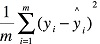

In [ ]:
import numpy as np        #是主要用於資料處理上,支援非常多的科學計算，包含矩陣運算、線性代數、傅立葉轉換等。
import pandas as pd        #提供特殊資料結構，具有數據處理和資料分析的功能
import matplotlib.pyplot as plt  #資料視覺化,可以畫出各種圖型如長條圖、分佈圖、立體圖等 
import seaborn as sns       #資料視覺化:個基於 matplotlib 庫的高階 API。還有豐富的視覺化庫，包括一些複雜型別，如時間序列、聯合分佈圖(jointplots)和小提琴圖(violin diagrams)。



# 2. 載入資料集，觀察資料集

In [ ]:
# 載入糖尿病資料集，放到 my_data變數內
my_data = datasets.load_diabetes()

In [ ]:
# 直接觀察有哪些 key 在資料集內
print(my_data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


data： 特徵值

target：一年後患疾病的定量指標 

feature_names： 特徵名稱

DESCR： 這個資料集的描述

In [ ]:
# 觀察資料筆數
print("資料筆數:")
print(my_data.data.shape)
print("\n")

# 觀察我們資料的欄位名稱
print("資料的欄位名稱，分別是:")
print(my_data.feature_names)
print("\n")

# 觀察我們第一筆的資料內容
#print("第一筆的資料內容:")
#print(my_data.data[0])
#print("\n")

# 觀察我們第一筆的預測目標
#print("第一筆的預測目標:")
#print(my_data.target[0])
#print("\n")

# 每個 sklearn 所附的資料集都有 DESCR 這個key可以選來看，代表這個資料集的描述(description的縮寫)
# 這邊礙於篇幅的關係先註解掉了，讀者可以自行把註解拿掉執行看看
#print(my_data.DESCR)


資料筆數:
(442, 10)


資料的欄位名稱，分別是:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']




## 轉換成 DataFrame 格式


In [ ]:
# 資料轉成DataFrame
df = pd.DataFrame(my_data.data, columns = my_data.feature_names)
df['target'] = my_data.target

# print(df)預設是顯示5筆資料
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
#看看數據集的訊息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# 看看是否有缺失值

In [ ]:
#是否有空值
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

## 【混淆矩陣(confusion matrix)】
### 我們來看看每個變數（特徵）之間的關係，透過相關係係數去觀察有哪些特徵變數和目標變數有較高的相關性，每個特徵間的關係如何

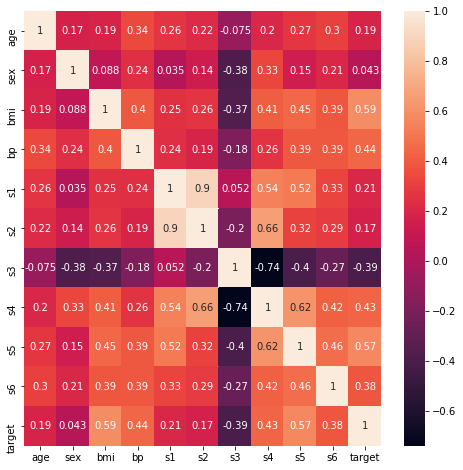

In [ ]:
# 產生畫布
plt.figure(figsize=(8, 8))

# 相關係數分析
correlation= df.corr()

# 產生熱力圖
sns.heatmap(correlation,annot=True)

方格的顏色越淺(正相關)或顏色越深(負相關)，相關程度越高。

我們可以注意到一個有趣的事實：我們所關注的年齡和糖尿病惡化程度的相關度只有0.19，

而s1與s2的相關度，高達0.9，小小技巧：兩者呈現出很強的線性關係！可以判斷有多餘的特徵，我們只需要保留其中一個。

通過檢驗特徵之間的相關度來找出多餘特徵，通過檢驗特徵與目標的相關度來找出無關特徵。



# 切分資料集 - 訓練集 / 測試集


In [ ]:
# 我們將樣本資料隨機排序 (Shuffle) 後將資料切分成兩組，把80%當成訓練集，20%當成測試集
# (train_x, train_y) 為80%的訓練集，用來訓練模型
# (test_x , test_y ) 為20%的測試集，用來驗證模型的預測能力

X_train = df.drop(['target','s1'], axis=1)
Y_train = df['target'] 

train_x, test_x, train_y, test_y=train_test_split(
           X_train, Y_train ,random_state=30, test_size = 0.2,shuffle=True)


# 可以看一下這些資料集的維度，驗證沒有切錯
print("原始資料集的維度大小:" , my_data.data.shape)
print("訓練集的維度大小:   " , train_x.shape)
print("測試集的維度大小:   " , test_x.shape)

原始資料集的維度大小: (442, 10)
訓練集的維度大小:    (353, 9)
測試集的維度大小:    (89, 9)


# 訓練模型及驗證模型

In [ ]:
# 把預先載入好的套件「線性回歸模型」拿出來使用，並且存到變數my_model中
my_model = LinearRegression()

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model 來預測測試集，產生出我們的預測值，存到 pred 變數內
pred = my_model.predict(test_x)

# 接著就可以使用我們的評估指標 MSE (mean_squared_error) 來評估我們模型
# 注意MSE分數是越接近 0 越好，代表預測的值與真實答案相差無幾

score_mse = mean_squared_error(pred, test_y)
score_rmse = np.sqrt(((pred - test_y) ** 2).mean())

print("模型評估完測試集的MSE: ", score_mse)
print("模型評估完測試集的RMSE: ", score_rmse)

模型評估完測試集的MSE:  3245.3877245124504
模型評估完測試集的RMSE:  56.96830456062783


## 視覺化呈現預測結果

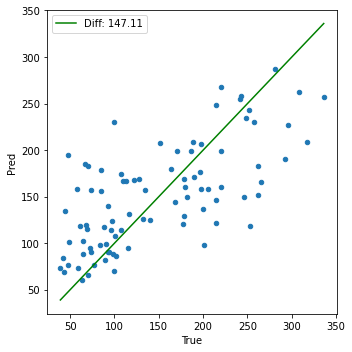

In [ ]:
import matplotlib.pyplot as plt

#y_pred = model.predict(test_x)
plt.figure(figsize=(5,5))
plt.scatter(test_y, pred, s=20)
plt.ylabel('Pred')
plt.xlabel('True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='green',label='Diff: '+str(round(max(abs(test_y - pred)),2)))
plt.legend(loc='upper left')
plt.tight_layout()

### Q: 那麼可以不要使用全部的10個特徵來訓練模型嗎?

### A: 我們可以嘗試看看只拿其中的5個特徵來訓練看看!

In [ ]:
X_train = df.drop(['target','s1'], axis=1)
#X_train = X_train.iloc[:, [2,7,8]] # 方法一
X_train = df[['bmi','bp','s4','s5','s6']] # 方法二
Y_train = df['target'] 

train_x, test_x, train_y, test_y=train_test_split(
           X_train, Y_train ,random_state=30, test_size = 0.2,shuffle=True)

# 把預先載入好的套件「線性回歸模型」拿出來使用，並且存到變數my_model中
my_model = LinearRegression()

# 訓練模型，放入要訓練的訓練集(train_x, train_y)
my_model.fit(train_x, train_y)

# 訓練完模型後，我們就可以用 my_model 來預測測試集，產生出我們的預測值，存到 pred 變數內
pred = my_model.predict(test_x)

# 接著就可以使用我們的評估指標 MSE (mean_squared_error) 來評估我們模型
# 注意MSE分數是越接近 0 越好，代表預測的值與真實答案相差無幾

score_mse = mean_squared_error(pred, test_y)
score_rmse = np.sqrt(((pred - test_y) ** 2).mean())

print("模型評估完測試集的MSE: ", score_mse)
print("模型評估完測試集的RMSE: ", score_rmse)



模型評估完測試集的MSE:  3313.653572497584
模型評估完測試集的RMSE:  57.56434289121682


上面模型只用5個特徵值的MSE:  2834.6847478734785

原始模型用全部10個特徵的MSE:  2924.2161481593953

# Q: 特徵要用多一點 或 少一點？
